# Testing Matplotlib - Part III :  Polyhedrons 
Stephane D., November 2022 

version v.2

## Objectives



<span style="color:#4169E1"> Polyhedrons (Platonic solids) are defined with their vertices and faces based on vertices numbers. <br>
For each Polyhedron, we will define: <br>
    
   * 3D coordinates of all vertices  
   * faces based on vertices numbers. 
    

<span style="color:#4169E1"> Theoretical aspects along with Matlab scripts are available in the book: <i> **"Modeling of Curves and Surfaces
with MATLAB"** </i>, by Vladimir Rovenski.  Springer (2010).[1] <br>

<span style="color:#4169E1">  We corrected a few typos. <br>
Implementation with Matlab is straightforward with "patch" function. <br> We test an option with Matplotlib <code>Poly3DCollection</code> and implement a Python <code>stellate</code> function adapted from V. Rovenski. Matlab code with the <code>patch.m</code> function is in section 2.4.2 page 106 in V. Rovenski's book [1]. <br> 
Vertices and faces are inputs to Matlplotlib <code>Poly3DCollection</code> function.  
    
    
References: <br>
    [1] https://link.springer.com/book/10.1007/978-0-387-71278-9 

### Table of contents

<span style="color:#4169E1"> Polyhedrons <br>
    
   *   Polyhedrons - platonic solids

      *   cube
      *   octahedron
      *   icosahedron
      *   dodecahedron
    
   *   Stellated (star-shaped) Polyhedrons
    
      *   stellated cube
      *   stellated octahedron
      *   stellated icosahedron   
      *   stellated dodecahedron    
    

## Import Libraries


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import axes3d
# Import math Library
import math

from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure
import matplotlib.pyplot as plt

In [43]:
#--------------------------------------------
# Notebook wide presentation
#--------------------------------------------
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

#-------  For centering figures 
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Polyhedrons

### Cube

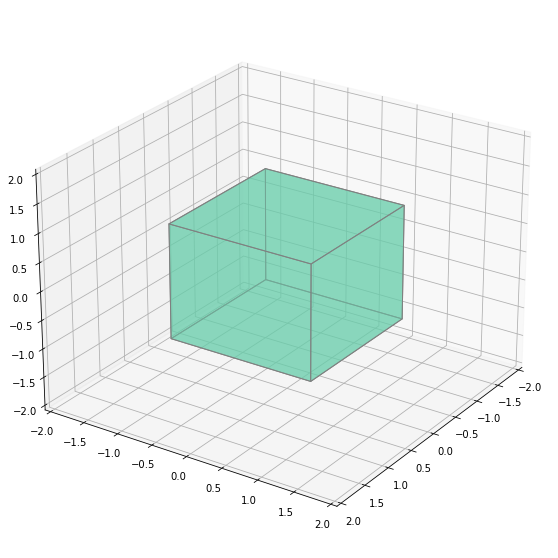

In [44]:
#=== V: Vertices
#=== F: Faces

Vcub = np.array([[-1 ,-1, -1], [1, -1, -1], [1, -1, 1], [-1, -1, 1], [-1, 1, -1], [1, 1 ,-1], [1, 1, 1], [-1, 1, 1]])
Fcub = np.array([[0 ,1, 2, 3], [0, 1 ,5 ,4], [1, 2, 6, 5] ,[0 ,3 ,7 ,4], [2 ,3 ,7 ,6], [4, 5, 6 ,7]])


#---------------------------------------------------------------------------
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.set_xlim3d(-2, 2)
ax.set_ylim3d(-2, 2)
ax.set_zlim3d(-2, 2)

for j in range(len(Fcub)):
    cub3d=Poly3DCollection([[tuple(y) for y in Vcub[Fcub[j],:]]], edgecolor = 'grey', linewidths=1, alpha=0.5)
     #cub3d.set_facecolor([(0,0,1),(0,1,0),(0,1,1),(1,0,0),(1,0,1),(1,1,0)][a[f]])
     #cub3d.set_facecolor("cornflowerblue")   
    cub3d.set_facecolor("mediumaquamarine") 
    ax.add_collection3d(cub3d)
ax.auto_scale_xyz
ax.view_init(elev=25., azim=34)
plt.show()

### Octahedron

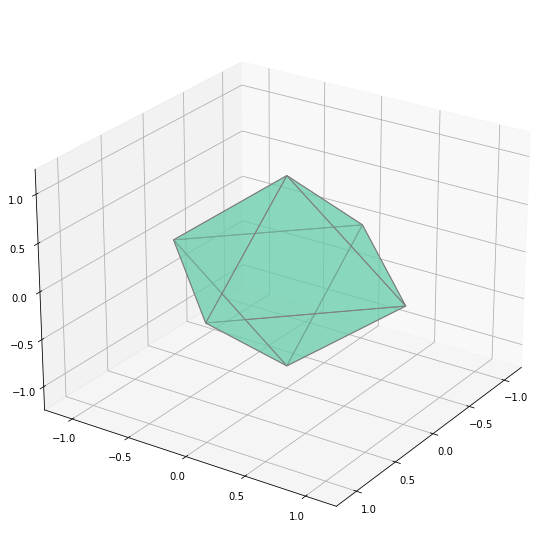

In [45]:
#=== V: Vertices
#=== F: Faces

Voct =np.array( [[-1, 0, 0], [0, 1, 0], [1, 0, 0], [0, -1, 0], [0, 0, -1], [0, 0, 1]])
Foct = np.array([[0, 1, 4], [0, 1, 5], [1, 2, 4], [1, 2, 5], [2, 3, 4], [2, 3, 5], [0, 3, 4], [0, 3, 5]] )   


#---------------------------------------------------------------------------
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.set_xlim3d(-1.2, 1.2)
ax.set_ylim3d(-1.2, 1.2)
ax.set_zlim3d(-1.2, 1.2)

for j in range(len(Foct)):
        oct3d=Poly3DCollection([[tuple(y) for y in Voct[Foct[j],:]]], edgecolor = 'grey', linewidths=1, alpha=0.5)
         #oct3d.set_facecolor("cornflowerblue")   
        oct3d.set_facecolor("mediumaquamarine") 
        ax.add_collection3d(oct3d)
ax.auto_scale_xyz
ax.view_init(elev=25., azim=34)
plt.show()

### Icosahedron

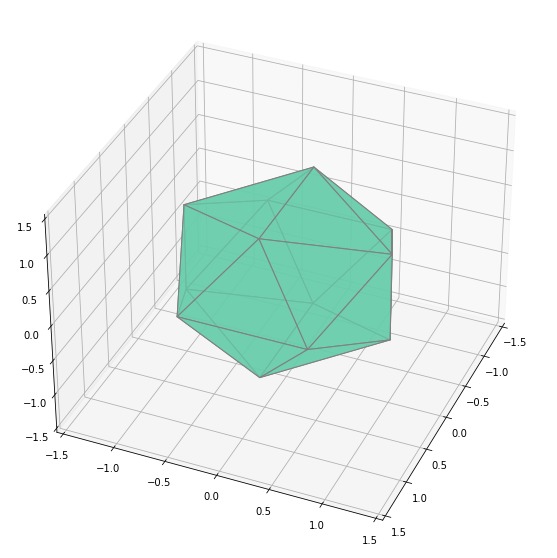

In [53]:
#=== V: Vertices
#=== F: Faces


c = 1
tau = (np.sqrt(5) + 1)/2
p = c / tau; # use for both polyhedra
Vico = np.array([[p ,0 ,c], [-p, 0, c], [0, c, p], [0 ,-c, p], [-c, p, 0], [-c, -p ,0], [c, p, 0], [c, -p ,0] ,[p, 0, -c] ,[0 ,c, -p],\
              [-p ,0 ,-c] ,[0 ,-c ,-p]])
Fico = np.array([[0 ,1 ,2], [0 ,1 ,3], [1, 2,4],    [1, 4 ,5], [0 ,6, 2] , [0, 7 ,6] ,[6 ,7 ,8], [6 ,9, 2], [6 ,9, 8] ,[2, 9, 4] , [8 ,10 ,9] , \
                    [0,7,3] , [3, 1, 5], [3, 11, 5] , [8, 10, 11] , [11, 10, 5], [10, 4 ,5] ,[7,11, 8] ,[3, 11, 7] ,[4, 9, 10]])

#---------------------------------------------------------------------------
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.set_xlim3d(-1.5, 1.5)
ax.set_ylim3d(-1.5, 1.5)
ax.set_zlim3d(-1.5, 1.5)

for j in range(len(Fico)):
        ico3d=Poly3DCollection([[tuple(y) for y in Vico[Fico[j],:]]], edgecolor = 'grey', linewidths=1, alpha=0.75) 
         #ico3d.set_facecolor("mediumaquamarine") 
        ico3d.set_facecolor("mediumaquamarine") 
        ax.add_collection3d(ico3d)
ax.auto_scale_xyz
ax.view_init(elev=35., azim=23)
plt.show()

###  Dodecahedron
  

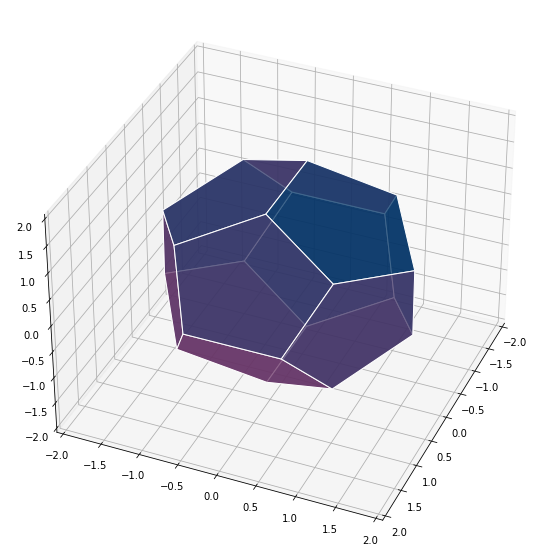

In [47]:
#=== V: Vertices
#=== F: Faces

c = 1
tau = (np.sqrt(5) + 1)/2 
p = c / tau

Vdod = np.array([[p, 0, c+p], [-p, 0, c+p], [p, 0, -c-p], [-p, 0, -c-p], [c+p, -p, 0], [c+p, p, 0], [-c-p, -p, 0], [-c-p, p, 0], \
                  [0, c+p, p] , [0, c+p, -p],  [0, -c-p, p],  [0, -c-p, -p],  [c, c, c],  [c, c, -c],  [c, -c, c],  [c, -c, -c], [-c, c, c] ,[-c, c, -c],\
                  [-c, -c, c], [-c ,-c ,-c]])
Fdod =np.array([ [0, 12, 8, 16, 1 ] ,[16, 8, 9 ,17, 7] , [7, 17, 3, 19, 6] , [6, 19, 11, 10, 18] , [18 ,10, 14, 0 ,1] , [5, 4, 14, 0, 12], \
                        [5, 12, 8, 9, 13] , [13 ,9, 17, 3, 2]  ,[2, 3, 19, 11, 15], [15, 11, 10, 14, 4],  [4, 5 ,13 ,2 ,15] , [18,  6, 7,  16, 1 ] ])

NF=len(Fdod)

#---------------------------------------------------------------------------
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.set_xlim3d(-2., 2.)
ax.set_ylim3d(-2., 2.)
ax.set_zlim3d(-2., 2.)

for j in range(len(Fdod)):
    poly3d=Poly3DCollection([[tuple(y) for y in Vdod[Fdod[j],:]]], edgecolor = 'white', linewidths=1, alpha=0.75) 
     #poly3d.set_facecolor("mediumaquamarine") 
    poly3d.set_facecolor( (j/(2*NF), 0.2 , 0.4 ) )
    ax.add_collection3d(poly3d)
ax.auto_scale_xyz
ax.view_init(elev=35., azim=23)
plt.show()

## Stellated solids: star-shaped polyhedra

We define the stellate function

In [48]:
def stellate(F,V,h):
    
    NF = len(F)
    NV = len(F[:][0])
    
    H=np.zeros(shape=(NF,3), dtype=float)
    C=np.zeros(shape=(NF,3), dtype=float)
    VH=np.zeros(shape=(NF,3), dtype=float)
    W=np.zeros(shape=(NF,NV,3,3), dtype='float')

    for i in range(NF) :  
       
        C[i,:] = np.array(np.sum(  V[F[i,:],:] ,axis=0 ) /NV)            # center of faces
        H[i,:] = np.cross( C[i,:] - V[F[i,1],:], C[i,:] - V[F[i,2],:])   # cross product computes the normal !   
        
        if np.dot(H[i,:],C[i,:].T) < 0 :      # Orient faces: Normal must point outside 
            H[i,:] = - H[i,:]
        
        NH =  np.dot(H[i,:],H[i,:].T)         
        VH[i,:] = C[i,:] + h*H[i,:]/NH  # vertices 
        
        for j in range(NV) :
            
            if j == NV-1 :       # Face:  close the loop, back to 1rst vertex of the face.  
                j1 = 0 
            else :
                j1 = j + 1                                                         
            W[i,j,:,:]= [ VH[i,:]  ,  V[F[i,j],:] ,  V[F[i,j1],:]   ] #  VERTICES OF Star-shaped polyhedron TRIANGULAR faces 
        
    return  W

### Star-shaped Cube

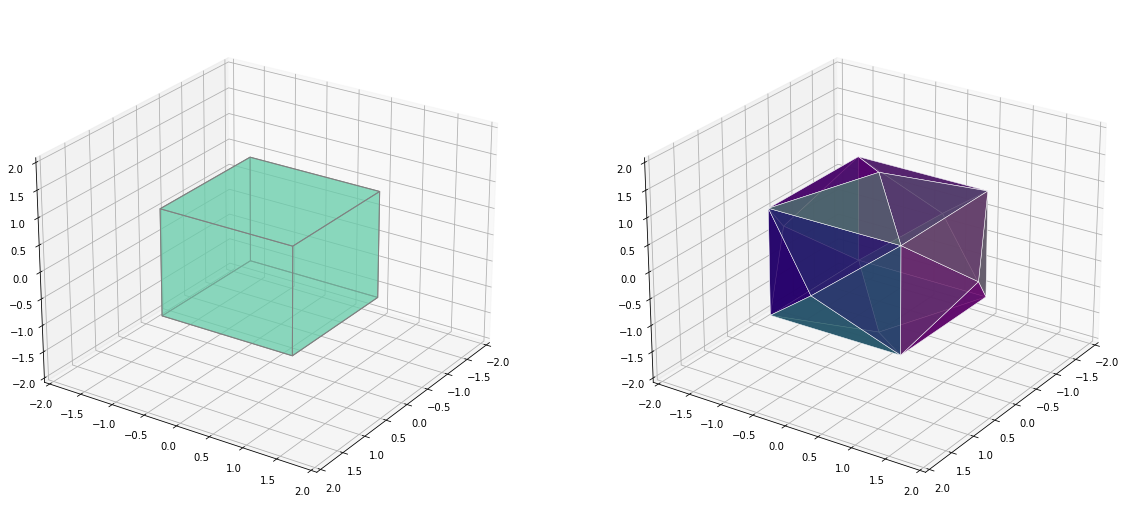

In [49]:
#=== V: Vertices
#=== F: Faces
#=== h: amplitude of "star" branch (height of faces center points).

Vcub = np.array([[-1 ,-1, -1], [1, -1, -1], [1, -1, 1], [-1, -1, 1], [-1, 1, -1], [1, 1 ,-1], [1, 1, 1], [-1, 1, 1]])
Fcub = np.array([[0 ,1, 2, 3], [0, 1 ,5 ,4], [1, 2, 6, 5] ,[0 ,3 ,7 ,4], [2 ,3 ,7 ,6], [4, 5, 6 ,7]])
hcub=1  #  amplitude of star branch (height of faces center points  ).    

NF = len(Fcub)
NV = len(Fcub[:][0])

W = stellate(Fcub,Vcub,hcub)   


fig=plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.grid()
ax.set_xlim3d(-2, 2)
ax.set_ylim3d(-2, 2)
ax.set_zlim3d(-2, 2)

for j in range(len(Fcub)):
    cub3d=Poly3DCollection([[tuple(y) for y in Vcub[Fcub[j],:]]], edgecolor = 'grey', linewidths=1, alpha=0.5)
     #cub3d.set_facecolor([(0,0,1),(0,1,0),(0,1,1),(1,0,0),(1,0,1),(1,1,0)][a[f]])
     #cub3d.set_facecolor("cornflowerblue")   
    cub3d.set_facecolor("mediumaquamarine") 
    ax.add_collection3d(cub3d)
ax.auto_scale_xyz
ax.view_init(elev=25., azim=34)

#=====================
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.grid()
ax.set_xlim3d(-2., 2.)
ax.set_ylim3d(-2., 2.)
ax.set_zlim3d(-2., 2.)


for l in range(NF) :
    for m in range(NV) :
        starcub=Poly3DCollection(W[l,m,:,:], edgecolor = 'white', linewidths=0.5, alpha=0.85) 
        #starcub.set_facecolor("turquoise") 
        starcub.set_facecolor((l/(2*NF), m/(2*NV), 0.42))
        #starcub.set_facecolor("turquoise") 
        #starcub.set_facecolor("mediumaquamarine") 
        ax.add_collection3d(starcub)
ax.auto_scale_xyz
ax.view_init(elev=25., azim=34)

### Star-shaped Octahedron

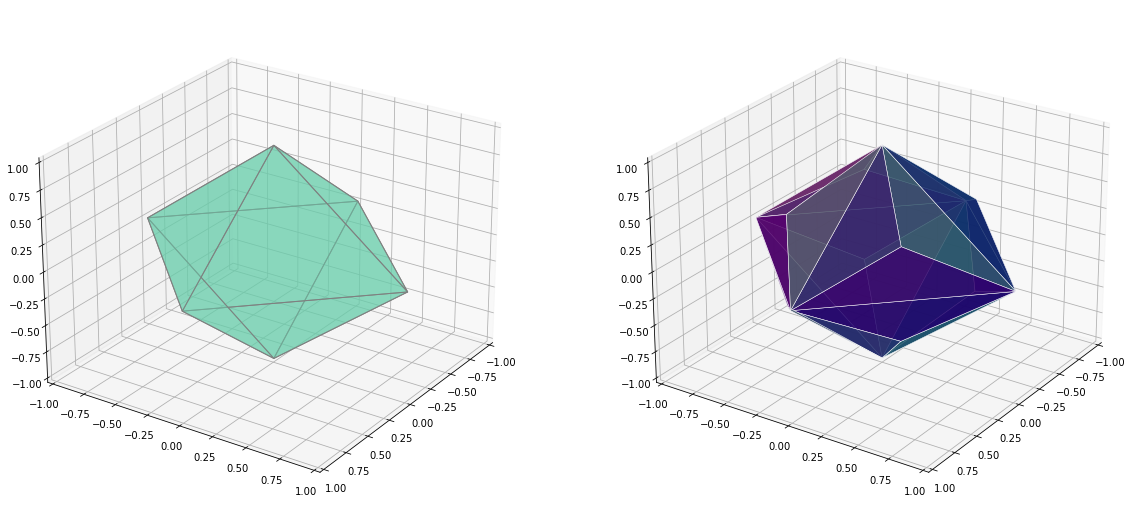

In [50]:
#=== V: Vertices
#=== F: Faces
#=== h: amplitude of "star" branch (height of faces center points).
Voct =np.array( [[-1, 0, 0], [0, 1, 0], [1, 0, 0], [0, -1, 0], [0, 0, -1], [0, 0, 1]])
Foct = np.array([[0, 1, 4], [0, 1, 5], [1, 2, 4], [1, 2, 5], [2, 3, 4], [2, 3, 5], [0, 3, 4], [0, 3, 5]] )   

hoct=0.1

NF = len(Foct)
NV = len(Foct[:][0])


W = stellate(Foct,Voct,hoct)



fig=plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.grid()
ax.set_xlim3d(-1.0, 1.0)
ax.set_ylim3d(-1.0, 1.0)
ax.set_zlim3d(-1.0, 1.0)

for j in range(len(Foct)):
        oct3d=Poly3DCollection([[tuple(y) for y in Voct[Foct[j],:]]], edgecolor = 'grey', linewidths=1, alpha=0.5)
         #oct3d.set_facecolor("cornflowerblue")   
        oct3d.set_facecolor("mediumaquamarine") 
        ax.add_collection3d(oct3d)
ax.auto_scale_xyz
ax.view_init(elev=25., azim=34)

#=====================
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.grid()
ax.set_xlim3d(-1.0, 1.0)
ax.set_ylim3d(-1.0, 1.0)
ax.set_zlim3d(-1.0, 1.0)


for l in range(NF) :
    for m in range(NV) :
        staroct=Poly3DCollection(W[l,m,:,:], edgecolor = 'white', linewidths=0.5, alpha=0.85) 
        #staroct.set_facecolor("turquoise") 
        staroct.set_facecolor((l/(2*NF), m/(2*NV), 0.42))
        #staroct.set_facecolor("turquoise") 
        #staroct.set_facecolor("mediumaquamarine") 
        ax.add_collection3d(staroct)
ax.auto_scale_xyz
ax.view_init(elev=25., azim=34)

### Star-shaped Icosahedron

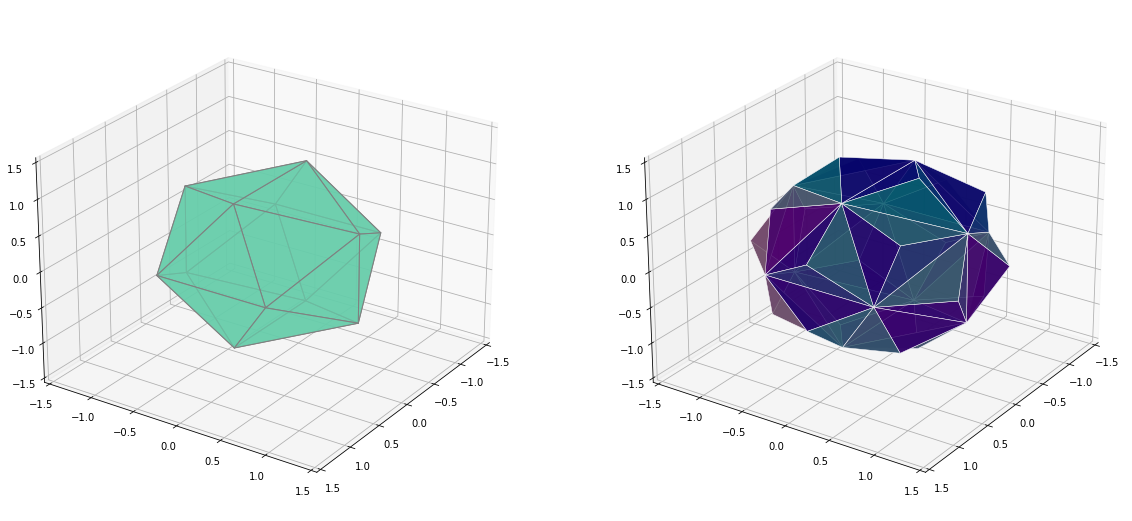

In [51]:
#=== V: Vertices
#=== F: Faces
#=== h: amplitude of "star" branch (height of faces center points).

c = 1
tau = (np.sqrt(5) + 1)/2
p = c / tau; # use for both polyhedra
Vico = np.array([[p ,0 ,c], [-p, 0, c], [0, c, p], [0 ,-c, p], [-c, p, 0], [-c, -p ,0], [c, p, 0], [c, -p ,0] ,[p, 0, -c] ,[0 ,c, -p],\
              [-p ,0 ,-c] ,[0 ,-c ,-p]])
Fico = np.array([[0 ,1 ,2], [0 ,1 ,3], [1, 2,4],    [1, 4 ,5], [0 ,6, 2] , [0, 7 ,6] ,[6 ,7 ,8], [6 ,9, 2], [6 ,9, 8] ,[2, 9, 4] , [8 ,10 ,9] , \
                    [0,7,3] , [3, 1, 5], [3, 11, 5] , [8, 10, 11] , [11, 10, 5], [10, 4 ,5] ,[7,11, 8] ,[3, 11, 7] ,[4, 9, 10]])


hico=0.15
NF = len(Fico)
NV = len(Fico[:][0])


W = stellate(Fico,Vico,hico)




#---------------------------------------------------------------------------
fig=plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.grid()
ax.set_xlim3d(-1.5, 1.5)
ax.set_ylim3d(-1.5, 1.5)
ax.set_zlim3d(-1.5, 1.5)

for j in range(len(Fico)):
        ico3d=Poly3DCollection([[tuple(y) for y in Vico[Fico[j],:]]], edgecolor = 'grey', linewidths=1, alpha=0.75) 
         #ico3d.set_facecolor("mediumaquamarine") 
        ico3d.set_facecolor("mediumaquamarine") 
        ax.add_collection3d(ico3d)
ax.auto_scale_xyz
ax.view_init(elev=25., azim=34)

#=====================
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.grid()
ax.set_xlim3d(-1.5, 1.5)
ax.set_ylim3d(-1.5, 1.5)
ax.set_zlim3d(-1.5, 1.5)


for l in range(NF) :
    for m in range(NV) :
        starico=Poly3DCollection(W[l,m,:,:], edgecolor = 'white', linewidths=0.5, alpha=0.85) 
        #staroct.set_facecolor("turquoise") 
        starico.set_facecolor((l/(2*NF), m/(2*NV), 0.42))
        #staroct.set_facecolor("turquoise") 
        #staroct.set_facecolor("mediumaquamarine") 
        ax.add_collection3d(starico)
ax.auto_scale_xyz
ax.view_init(elev=25., azim=34)


### Star-shaped dodecahedron

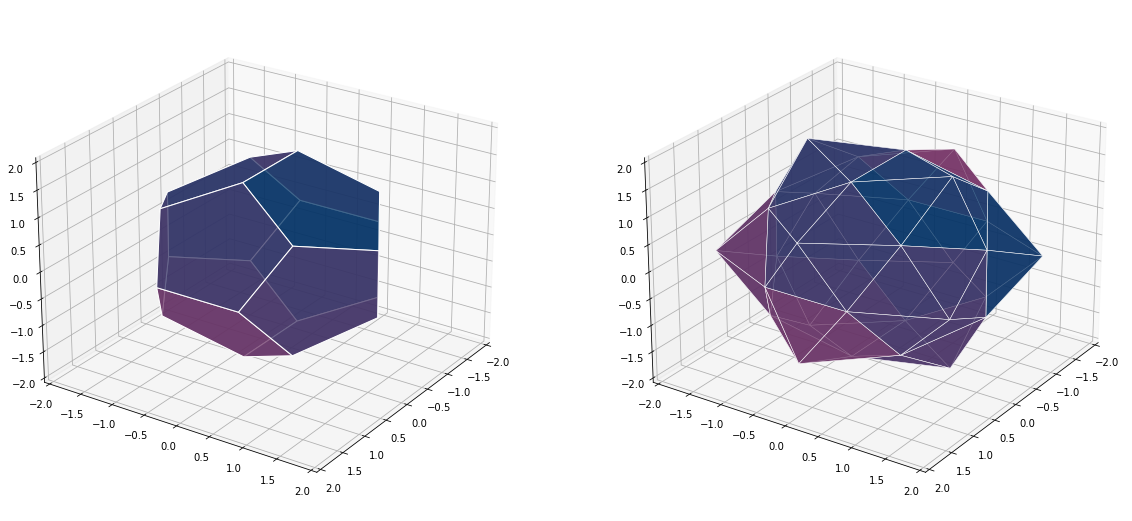

In [52]:
#=== V: Vertices
#=== F: Faces
#=== h: amplitude of "star" branch (height of faces center points).
c = 1
tau = (np.sqrt(5) + 1)/2 
p = c / tau

Vdod = np.array([[p, 0, c+p], [-p, 0, c+p], [p, 0, -c-p], [-p, 0, -c-p], [c+p, -p, 0], [c+p, p, 0], [-c-p, -p, 0], [-c-p, p, 0], \
                  [0, c+p, p] , [0, c+p, -p],  [0, -c-p, p],  [0, -c-p, -p],  [c, c, c],  [c, c, -c],  [c, -c, c],  [c, -c, -c], [-c, c, c] ,[-c, c, -c],\
                  [-c, -c, c], [-c ,-c ,-c]])
Fdod =np.array([ [0, 12, 8, 16, 1 ] ,[16, 8, 9 ,17, 7] , [7, 17, 3, 19, 6] , [6, 19, 11, 10, 18] , [18 ,10, 14, 0 ,1] , [5, 4, 14, 0, 12], \
                        [5, 12, 8, 9, 13] , [13 ,9, 17, 3, 2]  ,[2, 3, 19, 11, 15], [15, 11, 10, 14, 4],  [4, 5 ,13 ,2 ,15] , [18,  6, 7,  16, 1 ] ])

hdod=0.75

NF = len(Fdod)
NV = len(Fdod[:][0])


W = stellate(Fdod,Vdod,hdod)


#---------------------------------------------------------------------------
fig=plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.grid()

ax.set_xlim3d(-2., 2.)
ax.set_ylim3d(-2., 2.)
ax.set_zlim3d(-2., 2.)

for j in range(len(Fdod)):
    poly3d=Poly3DCollection([[tuple(y) for y in Vdod[Fdod[j],:]]], edgecolor = 'white', linewidths=1, alpha=0.75) 
     #poly3d.set_facecolor("mediumaquamarine") 
     #poly3d.set_facecolor("mediumaquamarine")
    poly3d.set_facecolor( (j/(2*NF), 0.2 , 0.4 ) )
    ax.add_collection3d(poly3d)
ax.auto_scale_xyz
ax.view_init(elev=25., azim=34)


ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.grid()

ax.set_xlim3d(-2., 2.)
ax.set_ylim3d(-2., 2.)
ax.set_zlim3d(-2., 2.)


for l in range(NF) :
    for m in range(NV) :
        stardod=Poly3DCollection(W[l,m,:,:], edgecolor = 'white', linewidths=0.5, alpha=0.75) 
        #stardod.set_facecolor("turquoise") 
        #stardod.set_facecolor((l/(1.5*NF), 0.4 , m/(1.5*NV)  ))
        stardod.set_facecolor((l/(2*NF), 0.2 , 0.4 ))
        #stardod.set_facecolor("turquoise") 
        #stardod.set_facecolor("mediumaquamarine") 
        ax.add_collection3d(stardod)
ax.auto_scale_xyz
ax.view_init(elev=25., azim=34)


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description                       |
| ----------------- | ------- | --------------- | ---------------------------------------- |
| 2022-11-29        | 0.1     |   Stephane D.   | Platonic Solids                          |
| 2022-12-07         | 0.2     |   Stephane D.   | Function Stellate debugged \& completed  |